## Session11 자연어처리 
## Quest 1. 많이 쓰인 명사, 동사, 형용사 그래프 그리기

In [1]:
import pandas as pd
import nltk
import re
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to C:\Users\LEE
[nltk_data]     KO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LEE KO\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to C:\Users\LEE
[nltk_data]     KO\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [3]:
from nltk.corpus import gutenberg
files_en = gutenberg.fileids()  
files_en

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
doc_en = gutenberg.open('whitman-leaves.txt').read()
doc_en[:1000]

"[Leaves of Grass by Walt Whitman 1855]\n\n\nCome, said my soul,\nSuch verses for my Body let us write, (for we are one,)\nThat should I after return,\nOr, long, long hence, in other spheres,\nThere to some group of mates the chants resuming,\n(Tallying Earth's soil, trees, winds, tumultuous waves,)\nEver with pleas'd smile I may keep on,\nEver and ever yet the verses owning--as, first, I here and now\nSigning for Soul and Body, set to them my name,\n\nWalt Whitman\n\n\n\n[BOOK I.  INSCRIPTIONS]\n\n}  One's-Self I Sing\n\nOne's-self I sing, a simple separate person,\nYet utter the word Democratic, the word En-Masse.\n\nOf physiology from top to toe I sing,\nNot physiognomy alone nor brain alone is worthy for the Muse, I say\n    the Form complete is worthier far,\nThe Female equally with the Male I sing.\n\nOf Life immense in passion, pulse, and power,\nCheerful, for freest action form'd under the laws divine,\nThe Modern Man I sing.\n\n\n\n}  As I Ponder'd in Silence\n\nAs I ponder'd 

In [5]:
import re
text = re.sub('<.+?>', '', doc_en, 0)
print(text[:1000])
len(text)

[Leaves of Grass by Walt Whitman 1855]


Come, said my soul,
Such verses for my Body let us write, (for we are one,)
That should I after return,
Or, long, long hence, in other spheres,
There to some group of mates the chants resuming,
(Tallying Earth's soil, trees, winds, tumultuous waves,)
Ever with pleas'd smile I may keep on,
Ever and ever yet the verses owning--as, first, I here and now
Signing for Soul and Body, set to them my name,

Walt Whitman



[BOOK I.  INSCRIPTIONS]

}  One's-Self I Sing

One's-self I sing, a simple separate person,
Yet utter the word Democratic, the word En-Masse.

Of physiology from top to toe I sing,
Not physiognomy alone nor brain alone is worthy for the Muse, I say
    the Form complete is worthier far,
The Female equally with the Male I sing.

Of Life immense in passion, pulse, and power,
Cheerful, for freest action form'd under the laws divine,
The Modern Man I sing.



}  As I Ponder'd in Silence

As I ponder'd in silence,
Returning upon my poems, c

711215

In [6]:
#text = re.sub('\n',' ',text)

#대소문자 아닌것들 공백으로
letters_only = re.sub('[^a-zA-Z]', ' ', text)
letters_only[:500]

' Leaves of Grass by Walt Whitman         Come  said my soul  Such verses for my Body let us write   for we are one   That should I after return  Or  long  long hence  in other spheres  There to some group of mates the chants resuming   Tallying Earth s soil  trees  winds  tumultuous waves   Ever with pleas d smile I may keep on  Ever and ever yet the verses owning  as  first  I here and now Signing for Soul and Body  set to them my name   Walt Whitman     BOOK I   INSCRIPTIONS      One s Self I '

In [7]:
#다 소문자로
lower_case = letters_only.lower()
lower_case[:700]

' leaves of grass by walt whitman         come  said my soul  such verses for my body let us write   for we are one   that should i after return  or  long  long hence  in other spheres  there to some group of mates the chants resuming   tallying earth s soil  trees  winds  tumultuous waves   ever with pleas d smile i may keep on  ever and ever yet the verses owning  as  first  i here and now signing for soul and body  set to them my name   walt whitman     book i   inscriptions      one s self i sing  one s self i sing  a simple separate person  yet utter the word democratic  the word en masse   of physiology from top to toe i sing  not physiognomy alone nor brain alone is worthy for the muse'

In [8]:
#토큰화
words = lower_case.split()
print(len(words))
words[:10]

126285


['leaves',
 'of',
 'grass',
 'by',
 'walt',
 'whitman',
 'come',
 'said',
 'my',
 'soul']

In [9]:
#Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords.words('english')[:10]

[nltk_data] Downloading package stopwords to C:\Users\LEE
[nltk_data]     KO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [10]:
stopword_list=stopwords.words('english')

In [11]:
# stopwords 를 제거한 토큰들
print(len(words),end='')
print("개의 단어에서"),
words = [w for w in words if not w in stopword_list]
print(len(words),end='')
print("개로 줄였습니다")
words[:10]

126285개의 단어에서
65087개로 줄였습니다


['leaves',
 'grass',
 'walt',
 'whitman',
 'come',
 'said',
 'soul',
 'verses',
 'body',
 'let']

In [12]:
#Stemming-snowball
snowball_stemmer = nltk.stem.SnowballStemmer('english')
stemmed_words= [snowball_stemmer.stem(w) for w in words]
stemmed_words[:100]
#결과보니까 너무 원형이 잘림..

['leav',
 'grass',
 'walt',
 'whitman',
 'come',
 'said',
 'soul',
 'vers',
 'bodi',
 'let',
 'us',
 'write',
 'one',
 'return',
 'long',
 'long',
 'henc',
 'sphere',
 'group',
 'mate',
 'chant',
 'resum',
 'talli',
 'earth',
 'soil',
 'tree',
 'wind',
 'tumultu',
 'wave',
 'ever',
 'plea',
 'smile',
 'may',
 'keep',
 'ever',
 'ever',
 'yet',
 'vers',
 'own',
 'first',
 'sign',
 'soul',
 'bodi',
 'set',
 'name',
 'walt',
 'whitman',
 'book',
 'inscript',
 'one',
 'self',
 'sing',
 'one',
 'self',
 'sing',
 'simpl',
 'separ',
 'person',
 'yet',
 'utter',
 'word',
 'democrat',
 'word',
 'en',
 'mass',
 'physiolog',
 'top',
 'toe',
 'sing',
 'physiognomi',
 'alon',
 'brain',
 'alon',
 'worthi',
 'muse',
 'say',
 'form',
 'complet',
 'worthier',
 'far',
 'femal',
 'equal',
 'male',
 'sing',
 'life',
 'immens',
 'passion',
 'puls',
 'power',
 'cheer',
 'freest',
 'action',
 'form',
 'law',
 'divin',
 'modern',
 'man',
 'sing',
 'ponder',
 'silenc']

In [13]:
#lemmatizing으로
lemmatizer = nltk.stem.WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\LEE
[nltk_data]     KO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
lemmatized_words = [lemmatizer.lemmatize(w) for w in words]
lemmatized_words[:50]

['leaf',
 'grass',
 'walt',
 'whitman',
 'come',
 'said',
 'soul',
 'verse',
 'body',
 'let',
 'u',
 'write',
 'one',
 'return',
 'long',
 'long',
 'hence',
 'sphere',
 'group',
 'mate',
 'chant',
 'resuming',
 'tallying',
 'earth',
 'soil',
 'tree',
 'wind',
 'tumultuous',
 'wave',
 'ever',
 'plea',
 'smile',
 'may',
 'keep',
 'ever',
 'ever',
 'yet',
 'verse',
 'owning',
 'first',
 'signing',
 'soul',
 'body',
 'set',
 'name',
 'walt',
 'whitman',
 'book',
 'inscription',
 'one']

In [15]:
#lemmatized_words 갖고 단어들 품사 인식 태그하기
tags_en = nltk.pos_tag(lemmatized_words)

In [16]:
tags_en[:20]

[('leaf', 'JJ'),
 ('grass', 'NN'),
 ('walt', 'NN'),
 ('whitman', 'NN'),
 ('come', 'VBN'),
 ('said', 'VBD'),
 ('soul', 'JJ'),
 ('verse', 'NN'),
 ('body', 'NN'),
 ('let', 'VBD'),
 ('u', 'JJ'),
 ('write', 'VB'),
 ('one', 'CD'),
 ('return', 'NN'),
 ('long', 'RB'),
 ('long', 'RB'),
 ('hence', 'RB'),
 ('sphere', 'JJ'),
 ('group', 'NN'),
 ('mate', 'NN')]

In [17]:
noun=[]
adj=[]
verb=[]

#앞에서 lemmatize를 해줘서 거의 원형으로 나와있기는 하지만
#앞에 N이 있는 NN, NNS, NNP, NNPS가 명사
#앞에 V가 있는 VB VBD VBG VBN VBP 등이 동사
#앞에 J가 있는 JJ JJR JJS가 형용사에 해당

for item in tags_en:
    if item[1][0] == 'N':
        noun.append(item[0])
    elif item[1][0] == 'V':
        verb.append(item[0])
    elif item[1][0] == 'J':
        adj.append(item[0])

In [18]:
noun[:10]

['grass',
 'walt',
 'whitman',
 'verse',
 'body',
 'return',
 'group',
 'mate',
 'chant',
 'soil']

In [19]:
verb[:10]

['come',
 'said',
 'let',
 'write',
 'resuming',
 'tallying',
 'wind',
 'wave',
 'plea',
 'keep']

In [20]:
adj[:10]

['leaf',
 'soul',
 'u',
 'sphere',
 'earth',
 'tumultuous',
 'verse',
 'whitman',
 'simple',
 'separate']

In [21]:
#빈도수 세기 위해 collections의 counter 활용
import collections
import matplotlib.pyplot as plt

In [22]:
noun_info=collections.Counter(noun)
noun_info.most_common()[:50]

[('day', 334),
 ('life', 290),
 ('man', 243),
 ('night', 240),
 ('sea', 217),
 ('soul', 208),
 ('time', 204),
 ('death', 200),
 ('woman', 199),
 ('men', 199),
 ('land', 197),
 ('earth', 197),
 ('hand', 197),
 ('face', 165),
 ('city', 161),
 ('world', 158),
 ('word', 156),
 ('song', 155),
 ('thee', 153),
 ('thou', 147),
 ('year', 146),
 ('body', 139),
 ('war', 133),
 ('love', 129),
 ('eye', 128),
 ('thing', 127),
 ('voice', 121),
 ('joy', 121),
 ('air', 115),
 ('house', 114),
 ('state', 109),
 ('ship', 107),
 ('water', 106),
 ('nothing', 105),
 ('sun', 104),
 ('mother', 101),
 ('work', 99),
 ('star', 98),
 ('child', 95),
 ('see', 93),
 ('others', 93),
 ('field', 92),
 ('look', 91),
 ('rest', 88),
 ('place', 88),
 ('heart', 87),
 ('part', 86),
 ('age', 85),
 ('arm', 83),
 ('side', 79)]

In [23]:
#top20 nouns
top20_nouns=noun_info.most_common(20)
top20_nouns

[('day', 334),
 ('life', 290),
 ('man', 243),
 ('night', 240),
 ('sea', 217),
 ('soul', 208),
 ('time', 204),
 ('death', 200),
 ('woman', 199),
 ('men', 199),
 ('land', 197),
 ('earth', 197),
 ('hand', 197),
 ('face', 165),
 ('city', 161),
 ('world', 158),
 ('word', 156),
 ('song', 155),
 ('thee', 153),
 ('thou', 147)]

In [24]:
noun_df=pd.DataFrame(top20_nouns, columns=['Word', 'Count'])
noun_df

,Word,Count
0,day,334
1,life,290
2,man,243
3,night,240
4,sea,217
5,soul,208
6,time,204
7,death,200
8,woman,199
9,men,199


Text(0.5, 1.0, 'Top 20 nouns')

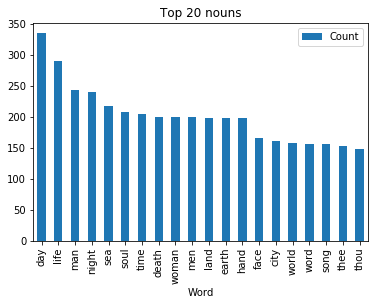

In [25]:
noun_df.plot.bar(x="Word", y="Count")
plt.title('Top 20 nouns')

In [26]:
#마찬가지로 동사와 형용사에 대해서 top20 그래프
verb_info=collections.Counter(verb)
top20_verbs=verb_info.most_common(20)
verb_df=pd.DataFrame(top20_verbs, columns=['Word', 'Count'])

adj_info=collections.Counter(adj)
top20_adjs=adj_info.most_common(20)
adj_df=pd.DataFrame(top20_adjs, columns=['Word', 'Count'])

Text(0.5, 1.0, 'Top 20 verbs')

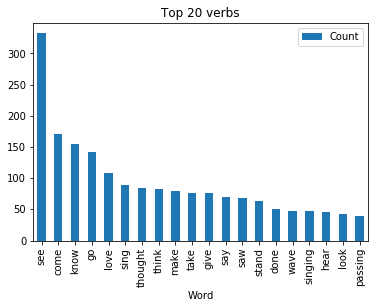

In [27]:
verb_df.plot.bar(x="Word", y="Count")
plt.title('Top 20 verbs')

Text(0.5, 1.0, 'Top 20 adjectives')

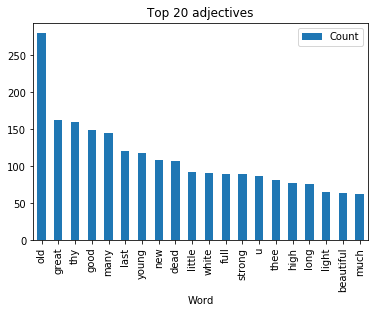

In [28]:
adj_df.plot.bar(x="Word", y="Count")
plt.title('Top 20 adjectives')

##  Quest 2. Word2Vec 모델 만들고 시각화

In [29]:
import re
import nltk

import pandas as pd
import numpy as np

from nltk.corpus import stopwords

In [34]:
data=pd.read_csv('hotel-reviews.csv')
data[:10]

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
5,id10331,We had - rooms. One was very nice and clearly ...,InternetExplorer,Desktop,happy
6,id10332,My husband and I have stayed in this hotel a f...,Firefox,Tablet,not happy
7,id10333,My wife & I stayed in this glorious city a whi...,Google Chrome,Mobile,happy
8,id10334,My boyfriend and I stayed at the Fairmont on a...,Internet Explorer,Desktop,happy
9,id10335,"Wonderful staff, great location, but it was de...",Chrome,Tablet,not happy


In [35]:
sentences = list(data["Description"])
sentences[:5]

["The room was kind of clean but had a VERY strong smell of dogs. Generally below average but ok for a overnight stay if you're not too fussy. Would consider staying again if the price was right. Breakfast was free and just about better than nothing.",
 "I stayed at the Crown Plaza April -- - April --, ----. The staff was friendly and attentive. The elevators are tiny (about -' by -'). The food in the restaurant was delicious but priced a little on the high side. Of course this is Washington DC. There is no pool and little for children to do. My room on the fifth floor had two comfortable beds and plenty of space for one person. The TV is a little small by todays standards with a limited number of channels. There was a small bit of mold in the bathtub area that could have been removed with a little bleach. It appeared the carpets were not vacummed every day. I reported a light bulb was burned out. It was never replaced. Ice machines are on the odd numbered floors, but the one on my flo

In [36]:
len(sentences)

38932

In [37]:
#특수문자 몇개만 제거
for i in range(len(sentences)):
    sentences[i]=re.sub("[(*&\r\n\!-\"\'.,;:]", "", sentences[i])

In [38]:
sentences[:5]

['The room was kind of clean but had a VERY strong smell of dogs Generally below average but ok for a overnight stay if youre not too fussy Would consider staying again if the price was right Breakfast was free and just about better than nothing',
 'I stayed at the Crown Plaza April -- - April -- ---- The staff was friendly and attentive The elevators are tiny about - by -) The food in the restaurant was delicious but priced a little on the high side Of course this is Washington DC There is no pool and little for children to do My room on the fifth floor had two comfortable beds and plenty of space for one person The TV is a little small by todays standards with a limited number of channels There was a small bit of mold in the bathtub area that could have been removed with a little bleach It appeared the carpets were not vacummed every day I reported a light bulb was burned out It was never replaced Ice machines are on the odd numbered floors but the one on my floor did not work I enco

In [39]:
#문장들 token화해서 통합 (+소문자로)
tokens=[]
for i in range(len(sentences)):
    tokens.append(nltk.word_tokenize(sentences[i].lower()))

In [40]:
tokens[:10]

[['the',
  'room',
  'was',
  'kind',
  'of',
  'clean',
  'but',
  'had',
  'a',
  'very',
  'strong',
  'smell',
  'of',
  'dogs',
  'generally',
  'below',
  'average',
  'but',
  'ok',
  'for',
  'a',
  'overnight',
  'stay',
  'if',
  'youre',
  'not',
  'too',
  'fussy',
  'would',
  'consider',
  'staying',
  'again',
  'if',
  'the',
  'price',
  'was',
  'right',
  'breakfast',
  'was',
  'free',
  'and',
  'just',
  'about',
  'better',
  'than',
  'nothing'],
 ['i',
  'stayed',
  'at',
  'the',
  'crown',
  'plaza',
  'april',
  '--',
  '-',
  'april',
  '--',
  '--',
  '--',
  'the',
  'staff',
  'was',
  'friendly',
  'and',
  'attentive',
  'the',
  'elevators',
  'are',
  'tiny',
  'about',
  '-',
  'by',
  '-',
  ')',
  'the',
  'food',
  'in',
  'the',
  'restaurant',
  'was',
  'delicious',
  'but',
  'priced',
  'a',
  'little',
  'on',
  'the',
  'high',
  'side',
  'of',
  'course',
  'this',
  'is',
  'washington',
  'dc',
  'there',
  'is',
  'no',
  'pool',
  'a

In [41]:
# Word2Vec 모델 만들기
from gensim.models.word2vec import Word2Vec
model = Word2Vec(tokens,size=100, window=3,workers=4, min_count=5, sg=1)
model.init_sims(replace=True)

C:\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [42]:
#테스트
print(model.wv.similarity('clean', 'kind'))

0.33040974


C:\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [43]:
#각 문장별로 키워드와 비슷한 단어
model.wv.most_similar('kind')

[('sincerity', 0.6204392313957214),
 ('inexperienced', 0.6130645871162415),
 ('genuinely', 0.6120833158493042),
 ('solicitous', 0.6107580661773682),
 ('understands', 0.6102120280265808),
 ('competence', 0.6068758964538574),
 ('universally', 0.604210376739502),
 ('dismissive', 0.6039984822273254),
 ('appreciative', 0.6025815010070801),
 ('humor', 0.5990073680877686)]

## t-SNE 통한 Word2Vec 시각화

In [44]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

mpl.rcParams['axes.unicode_minus'] = False

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

#100개 단어만 시각화
X_tsne = tsne.fit_transform(X[:100,:])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


16646
[ 0.01103332  0.10470705  0.02950185 -0.15392233  0.07010695 -0.08925308
 -0.04084546 -0.1121351   0.07081922 -0.0049465 ]


In [45]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

In [46]:
df.head(10)

,x,y
the,-20.776291,-4.875250
room,29.943312,-5.263610
was,12.937493,-6.039061
kind,18.658634,16.965828
of,-32.086735,-17.330061
clean,14.112064,3.345068
but,-8.732352,-12.051778
had,1.195564,25.395304
a,-25.123108,-0.576305
very,8.491652,1.090914


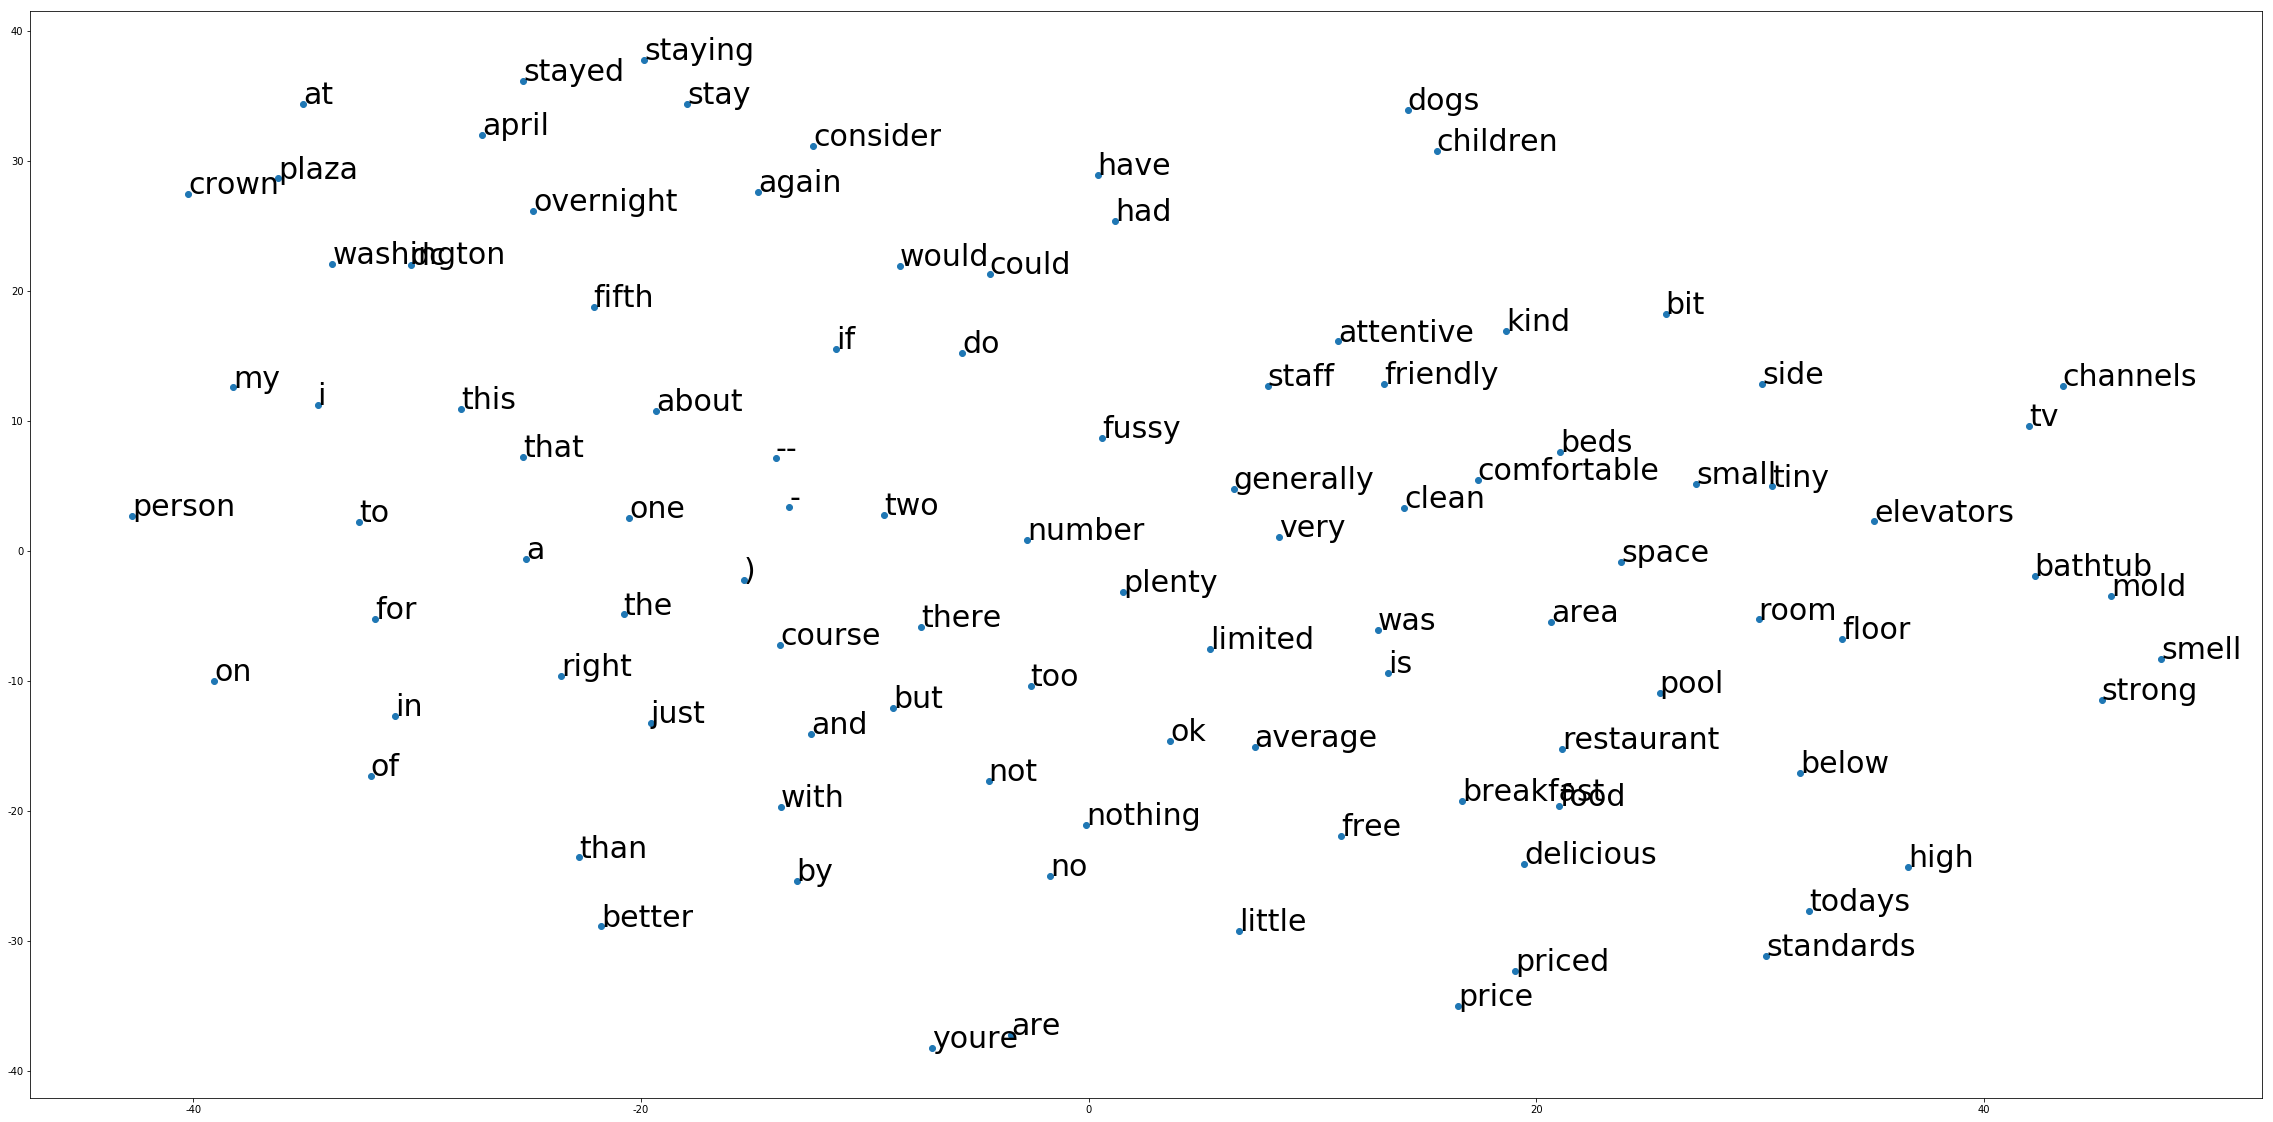

In [47]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()